<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [5]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


In [37]:
single_plane_images

array(['C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00001_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00002_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00003_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00004_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00005_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00006_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+C

['Z001', 'Z002', 'Z003', 'Z004', 'Z005', 'Z006', 'Z007', 'Z008', 'Z009', 'Z010', 'Z011', 'Z012', 'Z013', 'Z014', 'Z015', 'Z016', 'Z017', 'Z018', 'Z019', 'Z020', 'Z021', 'Z022', 'Z023', 'Z024', 'Z025', 'Z026', 'Z027', 'Z028', 'Z029', 'Z030', 'Z031', 'Z032', 'Z033', 'Z034', 'Z035', 'Z036', 'Z037', 'Z038', 'Z039', 'Z040', 'Z041', 'Z042', 'Z043', 'Z044', 'Z045', 'Z046', 'Z047', 'Z048', 'Z049', 'Z050', 'Z051', 'Z052', 'Z053', 'Z054', 'Z055', 'Z056', 'Z057', 'Z058', 'Z059', 'Z060', 'Z061', 'Z062', 'Z063', 'Z064', 'Z065', 'Z066', 'Z067', 'Z068', 'Z069', 'Z070', 'Z071', 'Z072', 'Z073', 'Z074', 'Z075', 'Z076', 'Z077', 'Z078', 'Z079', 'Z080', 'Z081', 'Z082', 'Z083', 'Z084', 'Z085', 'Z086', 'Z087', 'Z088', 'Z089', 'Z090', 'Z091', 'Z092', 'Z093', 'Z094', 'Z095', 'Z096', 'Z097', 'Z098', 'Z099', 'Z100', 'Z101', 'Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z113', 'Z114']


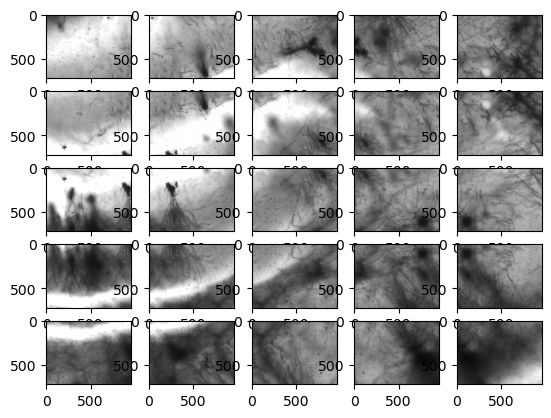

In [6]:
z_planes = sorted(list(set(image_df['z'])))
print(z_planes)

for cur_z in [z_planes[15]]:
    single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values
image_data_list = list()
for path in single_plane_images:
    image_data =cv2.imread(path)
    image_data_list.append(image_data)
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
image_data_list_sorted = [image_data_list[o] for o in order]

fig,ax=plt.subplots(5,5)
ax = ax.flatten()
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)

In [39]:
from stitching.images import Images
paths = single_plane_images
images = Images.of(paths)

StitchingError: images must be a list of images or filenames

TypeError: Images.of() missing 1 required positional argument: 'images'

In [7]:
!pip install stitching
from stitching import Stitcher


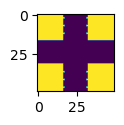

In [172]:
def plus_mask(img,n=.35,rs=None):
    if rs is None:
        rs = img.shape
    mask = np.ones_like(img[:,:,0])
    m_shape = np.shape(mask)
    mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),:] = 0
    mask[:,int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
    # mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
    mask = cv2.resize(mask, rs)
    return mask.astype(int)

fig,ax=plt.subplots(1,figsize=(1,1))
plt.imshow()

array([[1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1]])

In [11]:
subset = image_data_list

graph matches_graph{
"0" -- "1"[label="Nm=15, Ni=14, C=1.12"];
"0" -- "9"[label="Nm=22, Ni=20, C=1.36986"];
"1" -- "2"[label="Nm=41, Ni=39, C=1.92118"];
"1" -- "7"[label="Nm=24, Ni=20, C=1.31579"];
"1" -- "8"[label="Nm=42, Ni=37, C=1.79612"];
"2" -- "3"[label="Nm=14, Ni=13, C=1.06557"];
"3" -- "4"[label="Nm=52, Ni=51, C=2.16102"];
"3" -- "6"[label="Nm=22, Ni=18, C=1.23288"];
"4" -- "5"[label="Nm=23, Ni=20, C=1.34228"];
"5" -- "14"[label="Nm=72, Ni=70, C=2.36486"];
"6" -- "13"[label="Nm=15, Ni=15, C=1.2"];
"9" -- "10"[label="Nm=16, Ni=13, C=1.01563"];
"11" -- "12"[label="Nm=17, Ni=16, C=1.22137"];
"11" -- "18"[label="Nm=15, Ni=13, C=1.04"];
"14" -- "15"[label="Nm=28, Ni=27, C=1.64634"];
"16" -- "17"[label="Nm=26, Ni=25, C=1.58228"];
"16" -- "22"[label="Nm=12, Ni=12, C=1.03448"];
"16" -- "23"[label="Nm=26, Ni=24, C=1.51899"];
"17" -- "18"[label="Nm=27, Ni=25, C=1.5528"];
"18" -- "19"[label="Nm=20, Ni=16, C=1.14286"];
"19" -- "20"[label="Nm=24, Ni=23, C=1.51316"];
"19" -- "21"[label="Nm=1

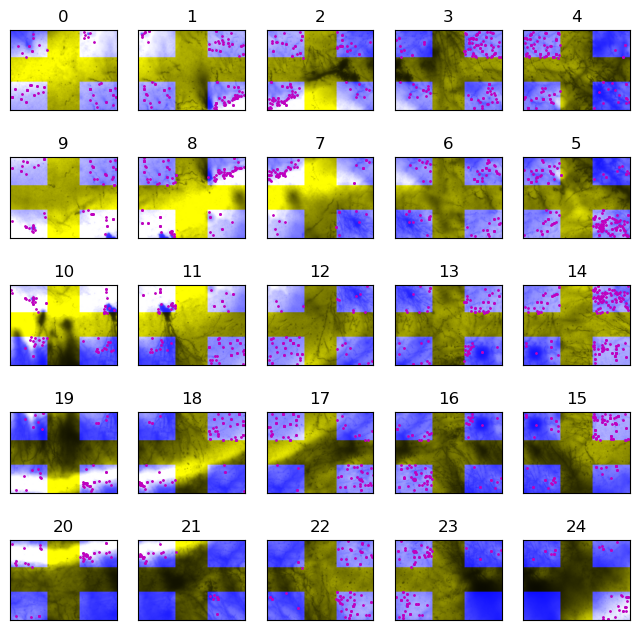

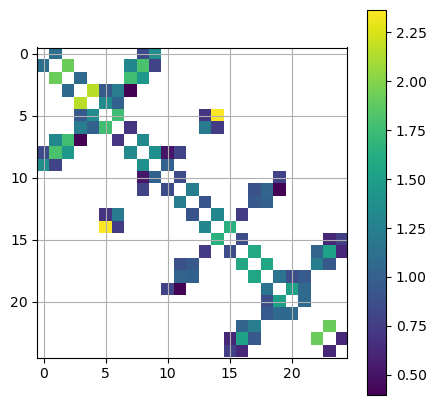

In [25]:
from stitching.images import Images
img = Images.of(subset, medium_megapix=0.96, low_megapix=0.1, final_megapix=-1)
medium_imgs = list(img.resize(Images.Resolution.MEDIUM))
subset = medium_imgs

from stitching.feature_detector import FeatureDetector
finder = FeatureDetector(detector='sift', nfeatures=500)

features = [finder.detect_features(img, plus_mask(img,n=.35) ) for img in subset]

from stitching.feature_matcher import FeatureMatcher
matcher = FeatureMatcher()
matches = matcher.match_features(features)
matcher.get_confidence_matrix(matches)
conf_mat = matcher.get_confidence_matrix(matches)

fig,ax=plt.subplots(5,5,figsize=(8,8))
ax = ax.flatten()
for i,(img,feat) in enumerate(zip(subset,features)):
    img_h = img.copy()
    img_h[:,:,2] = plus_mask(img,n=.35)*255
    ax[order[i]].imshow(img_h)
    ax[order[i]].set_xticks([])
    ax[order[i]].set_yticks([])
    for k in feat.keypoints:
        ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
        ax[order[i]].set_title(i)


conf_mat = matcher.get_confidence_matrix(matches)
conf_mat[conf_mat==0]=np.nan
fig,ax=plt.subplots(1,figsize=(5,5))
cb=ax.imshow(conf_mat)
plt.colorbar(cb)
ax.grid('on')
np.nanmin(conf_mat,1)

from stitching.subsetter import Subsetter
subsetter = Subsetter()
dot_notation = subsetter.get_matches_graph([str(i) for i in range(25)], matches)
print(dot_notation)



In [32]:
from stitching.camera_estimator import CameraEstimator
from stitching.camera_adjuster import CameraAdjuster
from stitching.camera_wave_corrector import WaveCorrector


camera_estimator = CameraEstimator()
camera_adjuster = CameraAdjuster()
wave_corrector = WaveCorrector()

cameras = camera_estimator.estimate(features, matches)
cameras = camera_adjuster.adjust(features, matches, cameras)
cameras = wave_corrector.correct(cameras)

In [44]:
from pathlib import Path
def get_image_paths(img_set):
    return [str(path.relative_to('.')) for path in Path('imgs').rglob(f'{img_set}*')]


In [68]:
from stitching.warper import Warper
warper = Warper()
warper.set_scale(cameras)

low_sizes = images.get_scaled_img_sizes(Images.Resolution.LOW)
camera_aspect = images.get_ratio(Images.Resolution.MEDIUM, Images.Resolution.LOW)  # since cameras were obtained on medium imgs

warped_low_imgs = list(warper.warp_images(low_imgs, cameras, camera_aspect))
warped_low_masks = list(warper.create_and_warp_masks(low_sizes, cameras, camera_aspect))
low_corners, low_sizes = warper.warp_rois(low_sizes, cameras, camera_aspect)

In [71]:
final_sizes = images.get_scaled_img_sizes(Images.Resolution.FINAL)
camera_aspect = images.get_ratio(Images.Resolution.MEDIUM, Images.Resolution.FINAL)

warped_final_imgs = list(warper.warp_images(final_imgs, cameras, camera_aspect))
warped_final_masks = list(warper.create_and_warp_masks(final_sizes, cameras, camera_aspect))
final_corners, final_sizes = warper.warp_rois(final_sizes, cameras, camera_aspect)

In [ ]:

fig,ax=plt.subplots(5,5,figsize=(8,8))
ax = ax.flatten()
for i,img in enumerate(warped_final_imgs):
    ax[order[i]].imshow(img)
    ax[order[i]].set_xticks([])
    ax[order[i]].set_yticks([])
    ax[order[i]].set_title(i)

In [82]:
def plot_image(img, figsize_in_inches=(5,5)):
    fig, ax = plt.subplots(figsize=figsize_in_inches)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

def plot_images(imgs, figsize_in_inches=(5,5)):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
    for col, img in enumerate(imgs):
        axs[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
from stitching.timelapser import Timelapser
timelapser = Timelapser('as_is')
timelapser.initialize(final_corners, final_sizes)

for img, corner in zip(warped_final_imgs, final_corners):
    timelapser.process_frame(img, corner)
    frame = timelapser.get_frame()
    plot_image(frame, (10,10))

In [ ]:
from stitching.cropper import Cropper

cropper = Cropper()
mask = cropper.estimate_panorama_mask(warped_low_imgs, warped_low_masks, low_corners, low_sizes)
plot_image(mask, (5,5))
lir = cropper.estimate_largest_interior_rectangle(mask)
print(lir)

plot = lir.draw_on(mask, size=2)
plot_image(plot, (5,5))

low_corners = cropper.get_zero_center_corners(low_corners)
rectangles = cropper.get_rectangles(low_corners, low_sizes)

plot = rectangles[1].draw_on(plot, (0, 255, 0), 2)  # The rectangle of the center img
plot_image(plot, (5,5))


overlap = cropper.get_overlap(rectangles[1], lir)
plot = overlap.draw_on(plot, (255, 0, 0), 2)
plot_image(plot, (5,5))

intersection = cropper.get_intersection(rectangles[1], overlap)
plot = intersection.draw_on(warped_low_masks[1], (255, 0, 0), 2)
plot_image(plot, (2.5,2.5))

In [87]:
cropper.prepare(warped_low_imgs, warped_low_masks, low_corners, low_sizes)

cropped_low_masks = list(cropper.crop_images(warped_low_masks))
cropped_low_imgs = list(cropper.crop_images(warped_low_imgs))
low_corners, low_sizes = cropper.crop_rois(low_corners, low_sizes)

lir_aspect = images.get_ratio(Images.Resolution.LOW, Images.Resolution.FINAL)  # since lir was obtained on low imgs
cropped_final_masks = list(cropper.crop_images(warped_final_masks, lir_aspect))
cropped_final_imgs = list(cropper.crop_images(warped_final_imgs, lir_aspect))
final_corners, final_sizes = cropper.crop_rois(final_corners, final_sizes, lir_aspect)

In [ ]:
timelapser = Timelapser('as_is')
timelapser.initialize(final_corners, final_sizes)

for img, corner in zip(cropped_final_imgs, final_corners):
    timelapser.process_frame(img, corner)
    frame = timelapser.get_frame()
    plot_image(frame, (10,10))

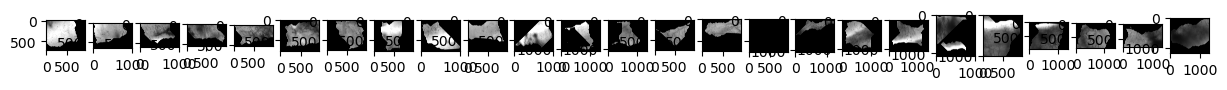

In [89]:
from stitching.seam_finder import SeamFinder

seam_finder = SeamFinder()

seam_masks = seam_finder.find(cropped_low_imgs, low_corners, cropped_low_masks)
seam_masks = [seam_finder.resize(seam_mask, mask) for seam_mask, mask in zip(seam_masks, cropped_final_masks)]

seam_masks_plots = [SeamFinder.draw_seam_mask(img, seam_mask) for img, seam_mask in zip(cropped_final_imgs, seam_masks)]
plot_images(seam_masks_plots, (15,10))

In [90]:
from stitching.exposure_error_compensator import ExposureErrorCompensator

compensator = ExposureErrorCompensator()

compensator.feed(low_corners, cropped_low_imgs, cropped_low_masks)

compensated_imgs = [compensator.apply(idx, corner, img, mask)
                    for idx, (img, mask, corner)
                    in enumerate(zip(cropped_final_imgs, cropped_final_masks, final_corners))]

In [92]:
from stitching.blender import Blender

blender = Blender()
blender.prepare(final_corners, final_sizes)
for img, mask, corner in zip(compensated_imgs, seam_masks, final_corners):
    blender.feed(img, mask, corner)
panorama, _ = blender.blend()

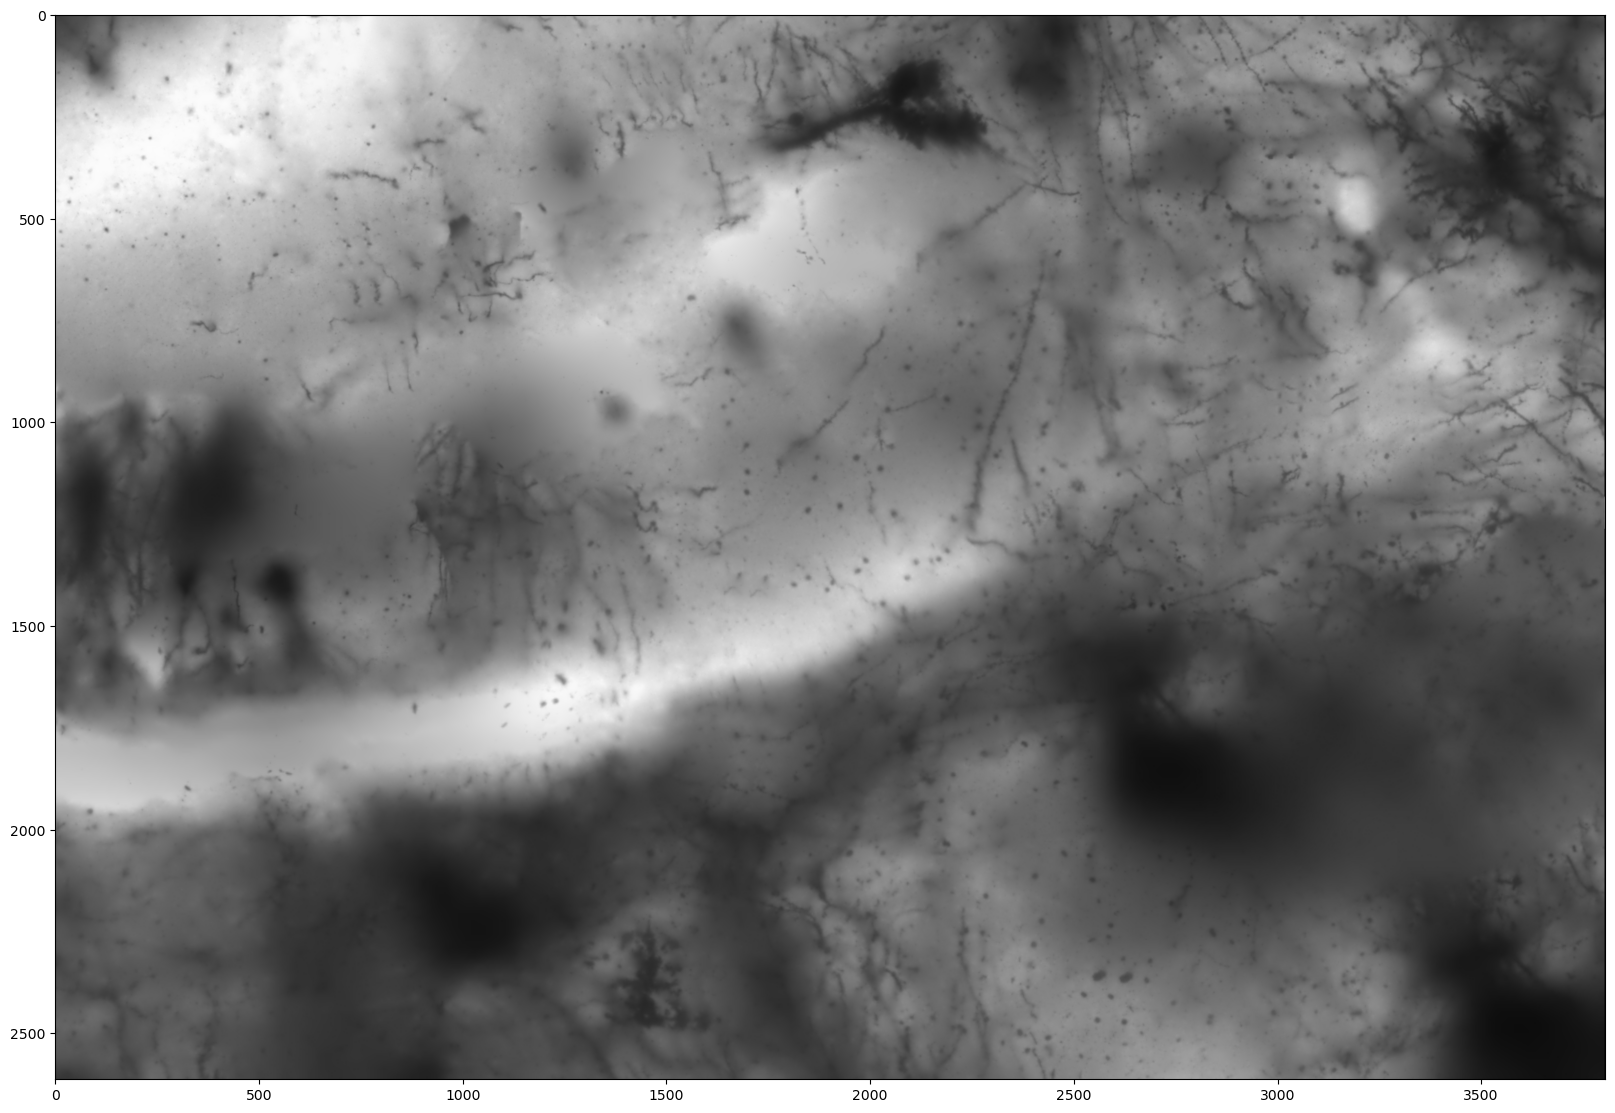

In [93]:
plot_image(panorama, (20,20))

In [ ]:
blended_seam_masks = seam_finder.blend_seam_masks(seam_masks, final_corners, final_sizes)
plot_image(seam_finder.draw_seam_lines(panorama, blended_seam_masks, linesize=3), (15,10))
plot_image(seam_finder.draw_seam_polygons(panorama, blended_seam_masks), (15,10))

In [100]:
images

In [184]:
from stitching import AffineStitcher

settings = {# The whole plan should be considered
            "crop": False,
            # The matches confidences aren't that good
            "confidence_threshold": 0.3}

aff_stitcher = AffineStitcher()
# panorama = aff_stitcher.stitch(subset)

images = Images.of(list(single_plane_images))
medium_imgs = list(images.resize(Images.Resolution.MEDIUM))
low_imgs = list(images.resize(Images.Resolution.LOW))
final_imgs = list(images.resize(Images.Resolution.FINAL))





{'estimator': 'affine',
 'wave_correct_kind': 'no',
 'matcher_type': 'affine',
 'adjuster': 'affine',
 'warper_type': 'affine',
 'compensator': 'no'}

graph matches_graph{
"0" -- "1"[label="Nm=37, Ni=35, C=1.83246"];
"0" -- "3"[label="Nm=6, Ni=4, C=0.408163"];
"0" -- "6"[label="Nm=18, Ni=9, C=0.671642"];
"0" -- "7"[label="Nm=9, Ni=3, C=0.280374"];
"0" -- "8"[label="Nm=9, Ni=6, C=0.560748"];
"0" -- "9"[label="Nm=56, Ni=40, C=1.6129"];
"0" -- "13"[label="Nm=9, Ni=4, C=0.373832"];
"0" -- "16"[label="Nm=13, Ni=4, C=0.336134"];
"0" -- "18"[label="Nm=10, Ni=3, C=0.272727"];
"0" -- "19"[label="Nm=10, Ni=5, C=0.454545"];
"0" -- "20"[label="Nm=9, Ni=3, C=0.280374"];
"1" -- "2"[label="Nm=64, Ni=54, C=1.98529"];
"1" -- "12"[label="Nm=11, Ni=4, C=0.353982"];
"2" -- "10"[label="Nm=14, Ni=4, C=0.327869"];
"2" -- "11"[label="Nm=11, Ni=4, C=0.353982"];
"2" -- "24"[label="Nm=6, Ni=3, C=0.306122"];
"3" -- "4"[label="Nm=104, Ni=90, C=2.29592"];
"3" -- "5"[label="Nm=23, Ni=13, C=0.872483"];
"3" -- "14"[label="Nm=11, Ni=4, C=0.353982"];
"3" -- "17"[label="Nm=8, Ni=3, C=0.288462"];
"4" -- "15"[label="Nm=11, Ni=3, C=0.265487"];
"7" -- "23"[label="Nm=6, Ni=

In [160]:
plus_mask = plus_mask

SyntaxError: invalid syntax (2604344450.py, line 1)

array([0.18181818, 0.18691589, 0.18181818, 0.18181818, 0.18181818,
       0.18691589, 0.18691589, 0.18691589, 0.16      , 0.18181818,
       0.18691589, 0.18181818, 0.19230769, 0.19230769, 0.18181818,
       0.18181818, 0.18691589, 0.19230769, 0.18181818, 0.18691589,
       0.20408163, 0.19230769, 0.18181818, 0.16      , 0.19230769])

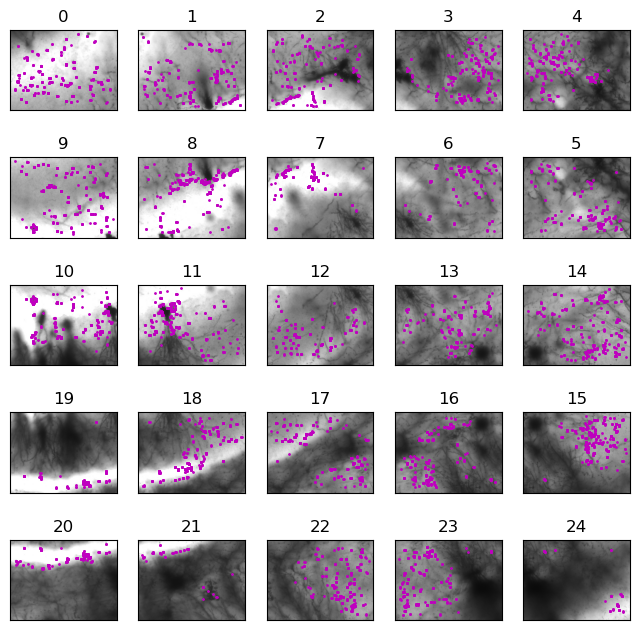

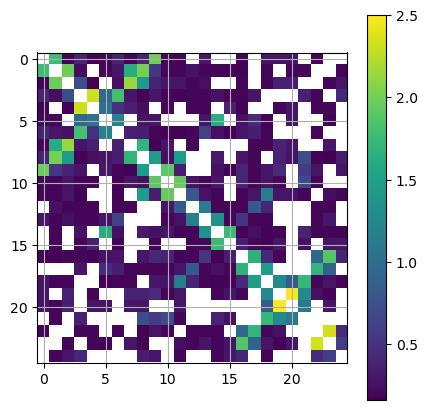

In [185]:
features = aff_stitcher.find_features(subset)


fig,ax=plt.subplots(5,5,figsize=(8,8))
ax = ax.flatten()
for i,(img,feat) in enumerate(zip(subset,features)):
    img_h = img.copy()
    # img_h[:,:,2] = plus_mask(img,n=.35)*255
    ax[order[i]].imshow(img_h)
    ax[order[i]].set_xticks([])
    ax[order[i]].set_yticks([])
    for k in feat.keypoints:
        ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
        ax[order[i]].set_title(i)

matches = aff_stitcher.match_features(features)
conf_mat = aff_stitcher.matcher.get_confidence_matrix(matches)
conf_mat[conf_mat==0]=np.nan
fig,ax=plt.subplots(1,figsize=(5,5))
cb=ax.imshow(conf_mat)
plt.colorbar(cb)
ax.grid('on')
np.nanmin(conf_mat,1)




In [187]:
indicies = aff_stitcher.subsetter.get_indices_to_keep(features,matches)
dot_notation = aff_stitcher.subsetter.get_matches_graph([str(i) for i in range(25)], matches)


graph matches_graph{
"0" -- "1"[label="Nm=39, Ni=35, C=1.77665"];
"0" -- "9"[label="Nm=54, Ni=48, C=1.98347"];
"1" -- "2"[label="Nm=68, Ni=56, C=1.97183"];
"1" -- "7"[label="Nm=33, Ni=29, C=1.62011"];
"1" -- "8"[label="Nm=71, Ni=59, C=2.01365"];
"3" -- "4"[label="Nm=104, Ni=91, C=2.32143"];
"3" -- "6"[label="Nm=62, Ni=48, C=1.80451"];
"4" -- "5"[label="Nm=25, Ni=16, C=1.03226"];
"5" -- "14"[label="Nm=45, Ni=35, C=1.62791"];
"8" -- "11"[label="Nm=45, Ni=31, C=1.44186"];
"9" -- "10"[label="Nm=57, Ni=48, C=1.91235"];
"11" -- "18"[label="Nm=23, Ni=17, C=1.14094"];
"12" -- "13"[label="Nm=22, Ni=17, C=1.16438"];
"13" -- "14"[label="Nm=32, Ni=24, C=1.36364"];
"14" -- "15"[label="Nm=55, Ni=43, C=1.7551"];
"16" -- "17"[label="Nm=69, Ni=48, C=1.67247"];
"16" -- "23"[label="Nm=62, Ni=50, C=1.8797"];
"17" -- "18"[label="Nm=39, Ni=29, C=1.47208"];
"17" -- "22"[label="Nm=40, Ni=34, C=1.7"];
"18" -- "19"[label="Nm=29, Ni=21, C=1.25749"];
"18" -- "21"[label="Nm=33, Ni=31, C=1.73184"];
"19" -- "20"[lab